## RETO
Obtener el resto de información de una nota:
- Titulo
- fecha
- copete
- volanta
- cuerpo 
- autor

- obtener contenido multimedia (utilizamos la libreria YPython.display)

In [6]:
import requests
from bs4 import BeautifulSoup
from IPython.display import Image

In [7]:
link_seccion='https://www.pagina12.com.ar/secciones/el-pais'
url = requests.get(link_seccion)
url.status_code
soup=BeautifulSoup(url.text, 'lxml')

In [8]:
def obtener_noticias(soup):
    lista_noticias=[]
    #obtener noticias promocionados
    noticias_promocionadas=soup.find('div', attrs={'class':'article-item__content'})
    if noticias_promocionadas:
        lista_noticias.append('https://pagina12.com.ar'+noticias_promocionadas.a.get('href'))

    #obtener resto de noticias
    resto_noticias=soup.find('section', attrs={'class':'list-content'})
    for i in resto_noticias.find_all('div', attrs={'class':'article-item__header'}):
        if i.a:
            lista_noticias.append('https://pagina12.com.ar'+i.a.get('href'))
    lista_noticias


    return lista_noticias

In [9]:
lista_noticias = obtener_noticias(soup)
lista_noticias

['https://pagina12.com.ar/495387-acabar-con-la-interna',
 'https://pagina12.com.ar/495359-garantizar-que-la-derecha-no-vuelva-a-la-argentina-es-un-deb',
 'https://pagina12.com.ar/495355-cordoba-en-un-confuso-episodio-hirieron-de-un-balazo-al-inte',
 'https://pagina12.com.ar/495290-dejen-de-jugar-a-los-tristes-y-ofendidos',
 'https://pagina12.com.ar/495221-mauricio-macri-quedo-en-el-centro-de-las-investigaciones-por',
 'https://pagina12.com.ar/495236-lula-la-historia-comun-durante-20-anos',
 'https://pagina12.com.ar/495267-ley-de-humedales-diputados-del-frente-de-todos-buscan-reflot',
 'https://pagina12.com.ar/495269-atentado-a-cfk-el-poder-judicial-mira-para-otro-lado',
 'https://pagina12.com.ar/495270-argentina-sera-sede-de-la-tercera-edicion-del-foro-mundial-d',
 'https://pagina12.com.ar/495213-maximo-kirchner-en-el-congreso-del-pj',
 'https://pagina12.com.ar/495179-larreta-critico-a-bullrich-sin-mencionarla']

In [10]:
#selecionamos el primer elemento de nuestro array que corresponde a una nota
link_nota= lista_noticias[0]
try:
    #hacemos la peticion de la web
    nota=requests.get(link_nota)
    #verificamos la respuesta del servidor sea 200
    if nota.status_code==200:
        #parseamos nuestra pagina web para analizar
        soup_nota=BeautifulSoup(nota.text, 'lxml')
        #extraemos el titulo de la nota
        titulo = soup_nota.find('h1').text
        print('Titulo: ',titulo)
        #extraemos la fecha de la nota
        fecha = soup_nota.find('time').get_text()
        print('Fecha: ',fecha)
        #extraemos el copete
        copete= soup_nota.find('h4').get_text()
        print('Copete: ',copete)
        #extraemos la volanta
        volanta= soup_nota.find('h3').get_text()
        print('Volanta: ',volanta)
        #extraemos el cuerpo de la nota
        cuerpo= soup_nota.find('div', attrs={'class':'article-main-content article-text'}).find_all('p')
        for c in cuerpo:
                print (c.get_text())
        #extraemos el autor de la nota
        autor= soup_nota.find('div', attrs={'class':'author-name'}).get_text()
        print ('autor: ', autor)

except Exception as e:
    print ('Error')
    print (e)
    print ('\n')

Titulo:  Acabar con la interna
Fecha:  6 de noviembre de 2022 - 14:33
Copete:  
Volanta:  
 La reaparición de Cristina en un acto público, tras el atentado, le lleva muchos cuerpos de ventaja al resto de las noticias “políticas”. Pero es mejor analizar cierta secuencia.
No debe haber antecedentes, en ninguna parte, de que haya dado resultados positivos alguna medida o paquete económico -estructural o de coyuntura- anunciados con anticipación. 
Muy por el contrario, y sobre todo si se trata de atacar un proceso inflacionario además desbocado, como el que sufren los argentinos, las consecuencias de adelantar disposiciones son exactamente inversas al efecto buscado.
El antecedente inmediato entre nosotros, que se conserva fresco para cualquiera con memoria atenta, es el discurso presidencial del 15 de marzo pasado.
Diputados terminaba de aprobar al acuerdo con el FMI. Y la guerra en Ucrania trazaba derivaciones graves para la economía mundial.
Alberto Fernández intervino con una pieza ret

In [20]:
#parseamos el tag div que contiene la imagen de la nota
media = soup_nota.find('div', attrs={'class':'article-main-media-image__container'})
media

<div class="article-main-media-image__container"><div class="image-wrapper"><figure><figure class="object-fit-block--contain intrinsic-container intrinsic-container-3x2"><img alt="" class="" src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2022-11/666432-whatsapp-20image-202022-11-04-20at-2017-43-03.jpeg?itok=zjEG3J9b"/></figure></figure></div></div>

In [21]:
#verificamos que nuestro elemento tenga un valor
# si es asi-> seleccionamos el propiedad img de nuestro tag
if len(media):
    imagen=media.img.get('src')
    print (imagen)
else:
    print ('no se encontraron imagenes')

https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2022-11/666432-whatsapp-20image-202022-11-04-20at-2017-43-03.jpeg?itok=zjEG3J9b


In [23]:
#solicitamos por medio de resquets la imagen de la nota
imagen_req=requests.get(imagen)
imagen_req.status_code

200

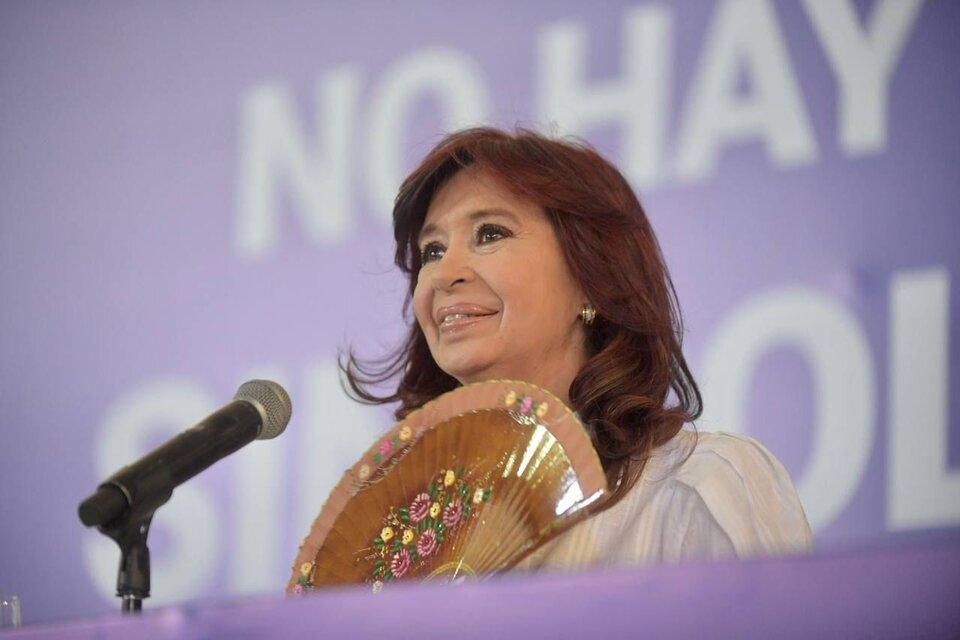

In [25]:
#utilizamos la libreria de imagen de python y llamamos a nuestro resquets de imagen
Image(imagen_req.content)